In [ ]:
#用PYTHON自動化生成報表
https://medium.com/%E4%BA%BA%E5%B7%A5%E6%99%BA%E6%85%A7%E7%A7%91%E6%99%AE%E7%B3%BB%E5%88%97/%E5%A6%82%E4%BD%95%E7%94%A8python%E8%87%AA%E5%8B%95%E5%8C%96%E7%94%9F%E6%88%90%E5%A0%B1%E8%A1%A8-6c8794b46561

In [1]:
import pandas as pd
import xlsxwriter
import matplotlib.pyplot as plt
import warnings

# 下面這行是讓惱人的warning不要跳出來
warnings.filterwarnings("ignore")

In [2]:
#執行緒移動到資料所在的位置

%cd C:\Users\11004076\Documents\Python Scripts\4_Automation
    
#Note: cd是系統指令中移動的意思。而cd前面的%是為了告訴PYTHON我們要執行系統指令。

C:\Users\11004076\Documents\Python Scripts\4_Automation


In [3]:

dfTem = pd.read_excel('test.xlsx', sheet_name='資產')

In [4]:
#我們可以直接執行這個變數，會自動顯示出這個變數裡面的資料是什麼樣子。
#NaN表示那個欄位沒有資料。你可以跟原圖對照一下應該很容易看懂dfTem和原來的資料之間的對應。

dfTem

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,
0,NaN,NaN,2019年,2020年,NaN
1,NaN,流動資產,第 1 年,第 2 年,NaN
2,NaN,現金,1000,1700,NaN
3,NaN,投資,1500,2550,NaN
4,NaN,存貨,650,1250,NaN
5,NaN,應收帳款,150,230,NaN
6,NaN,預付費用,1230,950,NaN
7,NaN,其他,120,120,NaN
8,NaN,流動資產總計,4650,6800,NaN
9,NaN,NaN,NaN,NaN,NaN


In [7]:
#第五步: 從資料中抓取資料
#通常我們不需要一次性的分析或整理整份資料，而是把依次的分析資料的某個部分，這邊我透過下面的指令抓取流動資產欄位的所有資料。

# 2019與2020的比較
df = dfTem.loc[2:8, ['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']]
df = df.rename(columns={'Unnamed: 1': '流動資產',
                        'Unnamed: 2': '2019', #我們幫他補上年份(2019)
                        'Unnamed: 3': '2020'}) #我們幫他補上年份(2020)

df =df.reset_index(drop=True)  # 把index重設。
df

,流動資產,2019,2020
0,現金,1000,1700
1,投資,1500,2550
2,存貨,650,1250
3,應收帳款,150,230
4,預付費用,1230,950
5,其他,120,120
6,流動資產總計,4650,6800


In [9]:
#其實python對於文字的容忍度是很高的，繁體中文簡體中文都沒有問題，
#但是我們等一下要用pandas函式內建的plot.bar()畫圖，這個函式完全不能顯示中文，所以我們要幫他翻譯一下

# 把中文翻成英文
df.at[0,'流動資產']= 'cash'
df.at[1,'流動資產']= 'investment'
df.at[2,'流動資產']= 'stock'
df.at[3,'流動資產']= 'AccountsReceivable'
df.at[4,'流動資產']= 'Prepayment'
df.at[5,'流動資產']= 'others'
df.at[6,'流動資產']= 'totalCurrentAssets'

df

,流動資產,2019,2020
0,cash,1000,1700
1,investment,1500,2550
2,stock,650,1250
3,AccountsReceivable,150,230
4,Prepayment,1230,950
5,others,120,120
6,totalCurrentAssets,4650,6800


In [15]:
#第七步: 設定index
#接下來我們要把cash, investment這些類別設定成我們資料的index以方便繪圖，用下面的指令。

try:
 df = df.set_index(dfTem.at[1, 'Unnamed: 1'])
 
except KeyError:
 print('你已經設定好index了')
df

#Try-except是PYTHON很好用的一種語法，可以忽略掉某個被指定的編譯錯誤，讓程序繼續執行。
#你可以試著對這一行執行兩次，第二次你在輸出欄會看到你已經設定好index了，
#因為第一次執行時已經把流動資產這個column設成index了，第二次執行會找不到流動資產這個column。

你已經設定好index了


,2019,2020
流動資產,,
cash,1000,1700
investment,1500,2550
stock,650,1250
AccountsReceivable,150,230
Prepayment,1230,950
others,120,120
totalCurrentAssets,4650,6800


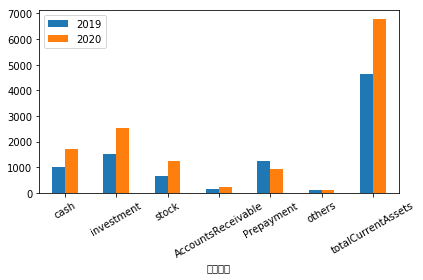

In [23]:
#第八步: 繪圖並且儲存
#我們用pandas內建的plot.bar()函式來幫我們自動繪圖，唯一要設置的參數是rot，
#我們的參數設置是rot = 30，這個參數會讓x軸的標籤旋轉30度，你可以把他調整成其他角度看看圖片有什麼不一樣。

ax = df.plot.bar(rot = 30) #rot=30可以讓x軸的標籤旋轉30度，文字才不會重疊
plt.plot()
plt.tight_layout() # 這一行可以避免圖片的邊緣被白邊切到
plt.savefig('bar_plot.png') # 把圖片存成bar_plot.png

In [24]:
#第九步: 把圖片插入到一個新建的excel裡面
#我們已經有圖片了，接下來我們可以透過下面的指令來把圖片插入excel裡面。結果如下所示:
#創建excel和編輯這份excel的函示庫是xlsxwriter，是一個非常便捷的函式庫。只是他沒辦法對本來就已經存在的excel做編輯。


# 下面這兩行可以創建一個新的excel(images.xlsx)
workbook = xlsxwriter.Workbook('images.xlsx')
worksheet = workbook.add_worksheet()
# 把第一個欄位(A欄)延長，確定等一下要插入的文字不會看不清楚
worksheet.set_column('A:A', 30)
# 插入物件到excel的指定欄位
worksheet.write('A2', '圖片插入:') # 在A2插入 ‘圖片插入’四個字
worksheet.insert_image('B2', 'bar_plot.png') # 在B2插入我們做的bar_plot.png
# 編輯完了，把這個編譯器關掉
workbook.close()